In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

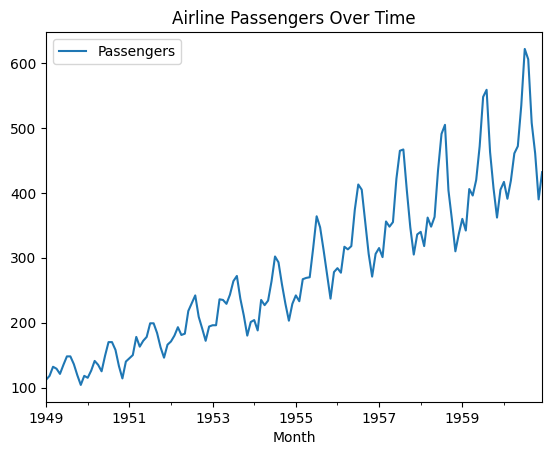

In [3]:
data.plot()
plt.title("Airline Passengers Over Time")
plt.show()

In [4]:
train, test = data[:-12], data[-12:]


In [5]:
model = SARIMAX(train, 
                order=(1, 1, 1),   # ARIMA order
                seasonal_order=(1, 1, 1, 12))  # Seasonal order (P, D, Q, s)
model_fit = model.fit()

c:\Users\developer14\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\developer14\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\developer14\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -445.700
Date:                            Tue, 28 Jan 2025   AIC                            901.399
Time:                                    13:33:15   BIC                            915.295
Sample:                                01-01-1949   HQIC                           907.042
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4963      0.313     -1.586      0.113      -1.110       0.117
ma.L1          0.2572      0.336   

In [7]:
forecast = model_fit.forecast(steps=12)


In [8]:
test['Forecast'] = forecast


C:\Users\developer14\AppData\Local\Temp\ipykernel_27812\3400855902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast'] = forecast


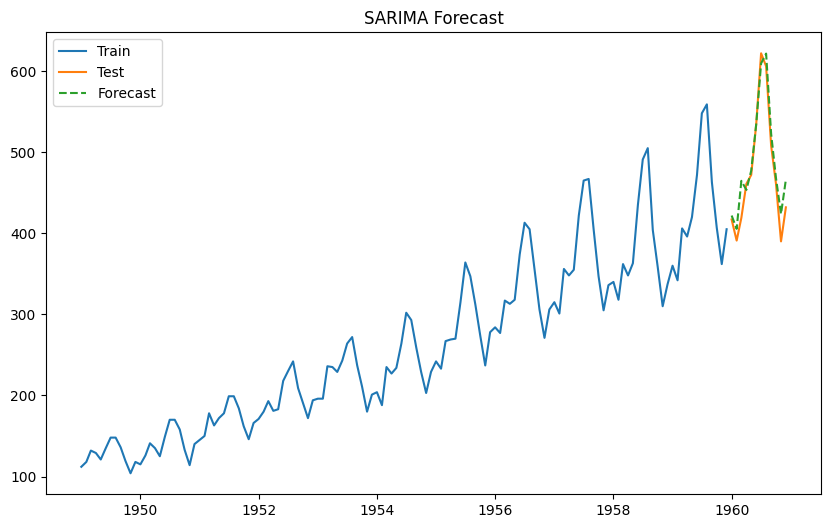

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(test['Forecast'], label='Forecast', linestyle='--')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

In [10]:
mse = mean_squared_error(test['Passengers'], test['Forecast'])
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 448.7672192941827
